<h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Tensorflow-Keras Custom Layers and Fundamental Building Blocks For Training Model - Detailed Video in my YouTube Channel</b><a id="0"></a></h1>


<a href="https://youtu.be/DNjqRL4NYTU?list=PLxqBkZuBynVQLW_TF7iIUKsWVCG-hCQFz"><h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Link to my YouTube Video</b></h1></a>

[![IMAGE ALT TEXT](https://imgur.com/7WAoWdZ.png)](https://youtu.be/DNjqRL4NYTU?list=PLxqBkZuBynVQLW_TF7iIUKsWVCG-hCQFz "Tensorflow-Keras Custom Layers and Fundamental Building Blocks For Training Model - Detailed Video in my YouTube Channel")


-----------------------

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

2021-11-16 17:35:41.748519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-16 17:35:41.748571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Creating custom Layer

If you look at the documentation for how to add custom layers, they recommend below

### Each custom Layer class must define __init__(), call(), (and usually) build():

- `__init__()` assigns layer-wide attributes (e.g. number of output units). If you know the input shape, you can also initialize the weights in the constructor as well.

- `build()` is not strictly required, but implementing it is a best practice. Defining this method allows you to instantiate weights lazily, which is important if you don’t know the size of the input when you initialize the custom layer.

- `call()` defines the forward pass. As long as these operations are differentiable and the weights are set to be trainable, TensorFlow will handle backpropagation for you.

In [2]:

from tensorflow import keras
import tensorflow as tf

class ChildDense(keras.layers.Layer):
  
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
      
  def build(self, input_shape):
    # Shape of the input data is referred by input_shape.
    input_dim = input_shape[-1]
    
    self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
    self.b = self.add_weight(shape=(self.units, ), initializer='zeros')
    
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y



-------------

In Python, the Method Resolution Order (MRO) is from bottom to top and left to right. This means that, first, the method is searched in the class of the object. If it’s not found, it is searched in the immediate super class. In the case of multiple super classes, it is searched left to right, in the order by which was declared by the developer. For example:

`def class C(B, A)`

In this case, the MRO would be C -> B -> A.

Since B was mentioned first in the class declaration


method resolution order defines the order in which the base classes are searched when executing a method. First, the method or attribute is searched within a class and then it follows the order we specified while inheriting.

-------------

### Meaning of `super().__init__()`

It means calling the `__init__` method of the superclass (as if it were a method of the current class since the current class is derived from the superclass).


In other words, it means to call a bound `__init__` method from the parent class that follows the Super's child class (the one that defines this method) in the instance's Method Resolution Order (MRO).

Super lets you avoid referring to the base class explicitly.

When you write a class, you want other classes to be able to use it. super() makes it easier for other classes to use the class you're writing.

#################
super() can enable that sort of architecture.
#################

When another class subclasses the class you wrote, it could also be inheriting from other classes. And those classes could have an __init__ that comes after this __init__ based on the ordering of the classes for method resolution.

Without super you would likely hard-code the parent of the class you're writing. This would mean that you would not call the next __init__ in the MRO, and you would thus not get to reuse the code in it.

If you're writing your own code for personal use, you may not care about this distinction. But if you want others to use your code, using super is one thing that allows greater flexibility for users of the code.


### `__init__` w.r.t this code above for creating custom Layer

 `__init__` is the first method in the class that will help to initialize the class. ‘init’ accepts parameters and converts them to variables that can be used within the class. This is inheriting from the ‘Layer’ class and hence requires some initialization. This initialization is done using the ‘super’ keyword. 
 
 
 **‘units’** is a local class variable. This is analogous to the number of units in the Dense layer. 


 ### activation

To add the activation we need to specify in the ‘__init__’ that we need an activation. Either a string or an instance of an activation object can be passed into this activation. It is set to default as None, so if no activation function is mentioned it will not throw an error. 

#### The default value is set to `32`, but can always be changed when the class is called.

-----------------------------

### `build()` Method

`build` is the next method in the class. This is used to specify the states. In the Dense layer, the two states required are ‘w’ and ‘b’, for weights and biases. When the Dense layer is being created, we are not just creating one neuron of the network’s hidden layer, but multiple neurons at one go

So if I pass 32 as the value for 'units' which is an argument inside the 'init' function in that case 32 neurons will be created. 
 
 Every neuron in the layer needs to be initialized and given some random weight and bias values. TensorFlow contains many built-in functions to initialize these values.

Here, for initializing the weights I am using the ‘random_normal_initializer’ function from TensorFlow, which will initialize weights randomly using a normal distribution. 


‘self.w’ contains the states of the weights in the form of a tensor variable.

----------------------------

## `input_shape`

The input shape parameter simply tells the input layer what the shape of one sample looks like. Adding it to your input layer, will ensure that a match is made.

-----------------------------

## `Initializers`

Initializers define the way to set the initial random weights of Keras layers.

Here First, I have used `initializer='random_normal'` => Meaning Initializer that generates tensors with a normal distribution.

initializer='zeros' => Initializer that generates tensors initialized to 0.

-----------------------------

## `add_weight`

Adds a new variable to the layer. It is a method for layers, and it creates a TensorFlow variable representing some mutable value in the layer. 

If you look at the documentation for how to add custom layers, they recommend that you use the .add_weight(...) method. 

##############
This method internally places all weights in `self._trainable_weights`.
##############

So to give an example of a build() method in a custom layer could look like this.



```py

def build(self, input_shape):
        self.mu = self.add_weight("mean", shape=[1], initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1), dtype=tf.float32)
        self.sigma = self.add_weight("std", shape=[1], initializer=tf.keras.initializers.RandomUniform(minval=EPS, maxval=5.0, seed=None), constraint=tf.keras.constraints.non_neg(), dtype=tf.float32)

```

mu and sigma are created from add_weights() during, build() method execution.

So over the `add_weight` method gives you a shortcut for creating weights.

It’s a good practice to create weights in a separate `build` method, called lazily with the shape of the first inputs seen by your layer
 
-----------------------------

### initializing the biases

For initializing the biases, TensorFlow’s ‘zeros_initializer’ function is used. This sets all the initial bias values to zero. ‘self.b’ is a tensor with a size same as the size of the units (here 32), and each of these 32 bias terms are set to zero initially. 

trainable=True

This is also set to ‘trainable’, so the bias terms will update as training starts.


---------------------

## `call` Medhod

‘call’ is the last method that performs the computation. In this case, as it is a Dense layer, it multiplies the inputs with the weights, adds the bias, and finally returns the output. The ‘matmul’ operation is used as self.w and self.b are tensors and not single numerical values.

------------------------

## What is the difference between `__init__` and `__call__`?


- The `__init__` method is used when the class is called to initialize the instance. That is when instantiating the class:

- while the `__call__` method is called when the instance is called. So `__call__` is a template to call the already instantiated class to do something

---------------------------


### Why keras use "call" instead of `__call__`?

https://stackoverflow.com/a/59407927/1902852 - Nice Explanation

Basically in Python, when you call an instance from class ```ClassA``` using ```ClassA()```, it is equivalent to ```ClassA.__call__()```. So it seems reasonable to use ```__call__()``` instead of ```call()``` in this case, right?

However, the reason we use ```call()``` is that when ```tf.keras``` calls a model or a layer, it has its own inner operations which are essential to keep its inner structure. As a result, it exposes a method ```call()``` for customer overloading. ```__call()__``` calls ```call()``` as well as some inner operations, so when we reload ```call()``` inheriting from ```tf.keras.Model``` or ```tf.keras.Layer```, we can call our custom code while keeping ```tf.keras```'s inner structure.

For example, from my experience, if your input is a numpy array instead of a tensor, you don't need to transform it manually if you write customer code in ```call()``` but if you overwrite ```__call__()```, it would be a problem since some inner operations are not called.



## Now stacking our ChildDense Layer



In [15]:
my_dense = ChildDense(units=32, activation=tf.nn.relu)

input_tensor = tf.ones(shape=(2, 784))

output_tensor = my_dense(input_tensor)

output_tensor.shape

TensorShape([2, 32])

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

model

## Models are like layers

The Keras Layer class has the same basic API as the Model class. Model has more methods exposed (e.g. fit, evaluate, save), but in the same way that a Layer can be composed of other Layers, a Model can be composed of Models and Layers. This is useful when you borrow functionality from pre-trained models:

# Dummy 2-class data generation in a 2D plane

This dataset will be nicely linearly separable synthetic data to work with:

I’ll generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean.

Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane. I’ll reuse the same covariance matrix for both point clouds, but I’ll use two different mean values for my positive samples and negative samples.

So the point clouds will have the same shape, but different positions.

In [17]:
num_of_samples_in_each_class = 2000

samples_negative = np.random.multivariate_normal(
  mean=[0, 3],
  cov=[[1, 0.5], [0.5, 1]],
  size = num_of_samples_in_each_class
)

samples_positive = np.random.multivariate_normal(
  mean=[3, 0],
  cov=[[1, 0.5], [0.5, 1]],
  size = num_of_samples_in_each_class
)


print(samples_negative.shape)
print(samples_positive.shape)

(500, 2)
(500, 2)


## Let’s stack them vertically into a single array with shape (4000, 2).

In [18]:
x_inputs = np.vstack((samples_negative, samples_positive)).astype(np.float32)

x_inputs.shape

(1000, 2)

## Now generating the corresponding target labels (y values)

The target vector will be an array of zeros and ones of shape (4000, 1), where 

- targets[i, 0] is 0 if inputs[i] belongs to class 0

- targets[i, 0] is 1 if inputs[i] belongs to class 1

In [19]:
y_targets = np.vstack((np.zeros((num_of_samples_in_each_class, 1), dtype='float32'), 
                       np.ones((num_of_samples_in_each_class, 1), dtype='float32') ))

y_targets.shape

(1000, 1)

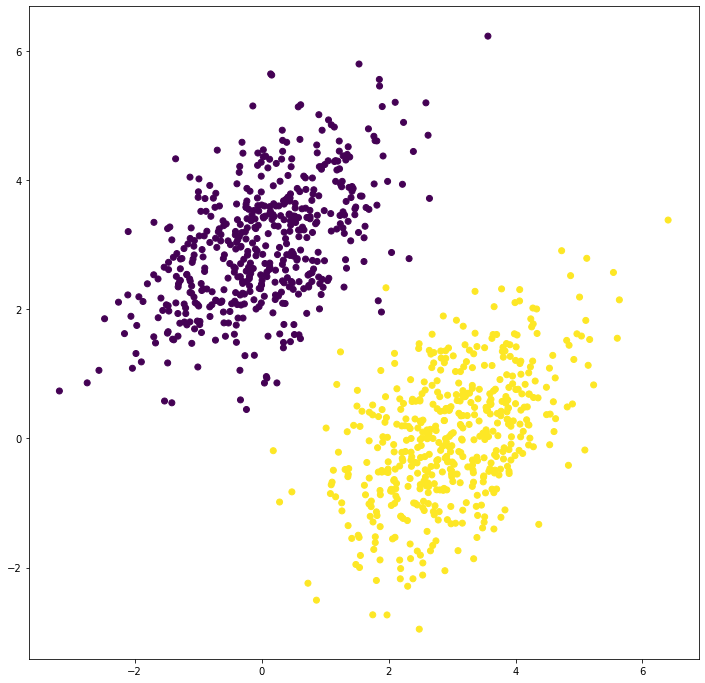

In [20]:
plt.figure(figsize=(12, 12))
plt.scatter(x_inputs[:, 0], x_inputs[:, 1], c=y_targets[:, 0])
plt.show()

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])


The “compile” step: Configuring the learning process

Once the model architecture is defined, you still have to choose three more things:

Loss function (objective function)—The quantity that will be minimized during
training. It represents a measure of success for the task at hand.


Optimizer—Determines how the network will be updated based on the loss func-
tion. It implements a specific variant of stochastic gradient descent (SGD).

Metrics—The measures of success you want to monitor during training and vali-
dation, such as classification accuracy. Unlike the loss, training will not optimize
directly for these metrics. As such, metrics don’t need to be differentiable.

Once you’ve picked your loss, optimizer, and metrics, you can use the built-in compile()
and fit() methods to start training your model. 

------------

## Splitting the Data into Trainings and Validation

To keep an eye on how the model does on new data, it’s standard practice to
reserve a subset of the training data as validation data: you won’t be training the model
on this data, but you will use it to compute a loss value and metrics value. You do this
by using the validation_data argument in fit(). Like the training data, the valida-
tion data could be passed as NumPy arrays or as a TensorFlow Dataset object.



In [32]:

indices_shuffled_permutated = np.random.permutation(len(x_inputs))

shuffled_inputs = x_inputs[indices_shuffled_permutated]

shuffled_targets = y_targets[indices_shuffled_permutated]

num_validation_samples = int(0.3 * len(x_inputs))

validataion_inputs = shuffled_inputs[:num_validation_samples]
# list[:5]       # items from the beginning through 5-1 i.e. the returns the first 4 items

validataion_targets = shuffled_targets[:num_validation_samples]

training_inputs = shuffled_inputs[num_validation_samples:]

training_targets = shuffled_targets[num_validation_samples:]

## Understanding the fit() method

After compile() comes fit(). The fit() method implements the training loop itself.
These are its key arguments:

 The data (inputs and targets) to train on. It will typically be passed either in the
form of NumPy arrays or a TensorFlow Dataset object.

 The number of epochs to train for: how many times the training loop should iterate over the data passed.

 The batch size to use within each epoch of mini-batch gradient descent: the
number of training examples considered to compute the gradients for one
weight update step.

In [33]:
history = model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(validataion_inputs, validataion_targets)
)

Epoch 1/5
44/44 [==============================] - 0s 3ms/step - loss: 0.1293 - binary_accuracy: 0.9629 - val_loss: 0.0249 - val_binary_accuracy: 0.9967
Epoch 2/5
44/44 [==============================] - 0s 1ms/step - loss: 0.0733 - binary_accuracy: 0.9543 - val_loss: 0.2941 - val_binary_accuracy: 0.6967
Epoch 3/5
44/44 [==============================] - 0s 1ms/step - loss: 0.0698 - binary_accuracy: 0.9629 - val_loss: 0.0598 - val_binary_accuracy: 0.9800
Epoch 4/5
44/44 [==============================] - 0s 1ms/step - loss: 0.0610 - binary_accuracy: 0.9686 - val_loss: 0.0331 - val_binary_accuracy: 0.9967
Epoch 5/5
44/44 [==============================] - 0s 1ms/step - loss: 0.0717 - binary_accuracy: 0.9571 - val_loss: 0.0364 - val_binary_accuracy: 0.9933





## History object after model training

The call to fit() returns a History object. This object contains a history field, which
is a dict mapping keys such as "loss" or specific metric names to the list of their per-
epoch values.

In [34]:
history.history

{'loss': [0.12928888201713562,
  0.07325465977191925,
  0.06984367221593857,
  0.0609784759581089,
  0.0716654509305954],
 'binary_accuracy': [0.9628571271896362,
  0.954285740852356,
  0.9628571271896362,
  0.9685714244842529,
  0.9571428298950195],
 'val_loss': [0.02485317923128605,
  0.2940950393676758,
  0.05980595946311951,
  0.033120375126600266,
  0.03640526533126831],
 'val_binary_accuracy': [0.996666669845581,
  0.6966666579246521,
  0.9800000190734863,
  0.996666669845581,
  0.9933333396911621]}

Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. Keras model provides a function, evaluate which does the evaluation of the model. It has three main arguments,

- Test data

- Test data label

- verbose - true or false

evaluate() will iterate in batches (of size batch_size) over the data passed and
return a list of scalars, where the first entry is the validation loss and the following
entries are the validation metrics. If the model has no metrics, only the validation loss
is returned (rather than a list).

In [35]:
loss_and_metrics = model.evaluate(validataion_inputs, validataion_targets, batch_size=128)

print('loss_and_metrics arrray is : ', loss_and_metrics)

print('Validation Loss:', loss_and_metrics[0]) 
print('Validation Accuracy:', loss_and_metrics[1])


3/3 [==============================] - 0s 861us/step - loss: 0.0364 - binary_accuracy: 0.9933
loss_and_metrics arrray is :  [0.03640526905655861, 0.9933333396911621]
Validation Loss: 0.03640526905655861
Validation Accuracy: 0.9933333396911621


## Inference: Using a model after training

Once you’ve trained your model, you’re going to want to use it to make predictions on new data.

predict() method => It will iterate over the data in small batches and return a NumPy array of predictions.

If we use predict() on some of our validation data with the linear model we trained earlier, we get scalar scores that correspond to the model’s prediction for each input sample:


In [36]:
predictions = model.predict(validataion_inputs, batch_size=128)
print(predictions[:10])

[[ 1.0271852 ]
 [ 0.08159208]
 [ 0.856363  ]
 [ 1.0178005 ]
 [ 0.0667682 ]
 [-0.12800726]
 [ 0.79028875]
 [ 0.03405413]
 [-0.16055426]
 [ 0.70171475]]
